In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from glob import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

## Demographics (Qualtrics data)

In [2]:
###demo sheets for each exp
demo_sheet1 = pd.read_csv("C:/Users/ayesh/Desktop/Gradstuff/ppt_consents/Pavlovia_consents_modified.csv", header = 0)
demo_sheet2 = pd.read_csv("C:/Users/ayesh/Desktop/Gradstuff/ppt_consents/Pavlovia_consents_XYversion.csv", header = 0)
demo_sheet3 = pd.read_csv("C:/Users/ayesh/Desktop/Gradstuff/ppt_consents/Pavlovia_consents_XYsequence.csv", header = 0)
demo_sheet4 = pd.read_csv("C:/Users/ayesh/Desktop/Gradstuff/ppt_consents/Pavlovia_consents_XYhappy.csv", header = 0)

###pts in the analysis
srcexp1_df = pd.read_csv('C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/srcAB3BC_inference.csv')
srcexp2_df = pd.read_csv('C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mTurk_pavlovia_data/summaryXYdata/srcAB3BC_inference.csv')
srcexp3_df = pd.read_csv('C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mTurk_pavlovia_data/SEQ_summary/srcAB3BC_inference.csv')
srcexp4_df = pd.read_csv('C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mTurk_pavlovia_data/HA_summary/srcAB3BC_inference.csv')

In [3]:
shrt1 = pd.DataFrame({"participant":demo_sheet1.workerID,
                     "pt_age":demo_sheet1.Q28,
                     "Genders":demo_sheet1.Q30,
                     "Races":demo_sheet1.Q32,
                     "n_English":demo_sheet1.Q34,
                     "Education":demo_sheet1.Q36})

shrt2 = pd.DataFrame({"participant":demo_sheet2.workerID,
                     "pt_age":demo_sheet2.Q28,
                     "Genders":demo_sheet2.Q30,
                     "Races":demo_sheet2.Q32,
                     "n_English":demo_sheet2.Q34,
                     "Education":demo_sheet2.Q36})

shrt3 = pd.DataFrame({"participant":demo_sheet3.workerID,
                     "pt_age":demo_sheet3.Q28,
                     "Genders":demo_sheet3.Q30,
                     "Races":demo_sheet3.Q32,
                     "n_English":demo_sheet3.Q34,
                     "Education":demo_sheet3.Q36})

shrt4 = pd.DataFrame({"participant":demo_sheet4.workerID,
                     "pt_age":demo_sheet4.Q28,
                     "Genders":demo_sheet4.Q30,
                     "Races":demo_sheet4.Q32,
                     "n_English":demo_sheet4.Q34,
                     "Education":demo_sheet4.Q36})

In [4]:
cnsl1 = srcexp1_df.merge(shrt1, how='inner', on='participant')
cnsl2 = srcexp2_df.merge(shrt2, how='inner', on='participant')
cnsl3 = srcexp3_df.merge(shrt3, how='inner', on='participant')
cnsl4 = srcexp4_df.merge(shrt4, how='inner', on='participant')

In [5]:
cnsl1.to_csv("C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/dem_covariance/exp1.csv")
cnsl2.to_csv("C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/dem_covariance/exp2.csv")
cnsl3.to_csv("C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/dem_covariance/exp3.csv")
cnsl4.to_csv("C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/dem_covariance/exp4.csv")

In [6]:
ovr1 = 0
ovr2 = 0
ovr3 = 0
ovr4 = 0

##create a summary datasheet with the exclusion of 45 and older
##1.cnsl1 = cnsl1[cnsl1["pt_age"] < 45]
##2.cnvrt to .csv
##3.run the analysis in R


for index, row in cnsl1.iterrows():
    if int(cnsl1.pt_age[index]) > 50:
        ovr1 +=1
        
for index, row in cnsl2.iterrows():
    if int(cnsl2.pt_age[index]) > 50:
        ovr2 +=1
        
for index, row in cnsl3.iterrows():
    if int(cnsl3.pt_age[index]) > 50:
        ovr3 +=1
        
for index, row in cnsl4.iterrows():
    if int(cnsl4.pt_age[index]) > 50:
        ovr4 +=1
        
        
print (ovr1, ovr2, ovr3, ovr4)

7 4 10 6


In [14]:
melted_df1 = pd.melt(cnsl1, id_vars=['participant', 'pt_age', 'Genders', 'Races', 'n_English', 'Education'], value_vars=['Avg AC', 'Avg AC_emo'], var_name='condition', value_name='Total_acc')
melted_df2 = pd.melt(cnsl2, id_vars=['participant', 'pt_age', 'Genders', 'Races', 'n_English', 'Education'], value_vars=['Avg AC', 'Avg AC_emo'], var_name='condition', value_name='Total_acc')
melted_df3 = pd.melt(cnsl3, id_vars=['participant', 'pt_age', 'Genders', 'Races', 'n_English', 'Education'], value_vars=['Avg AC', 'Avg AC_emo'], var_name='condition', value_name='Total_acc')
melted_df4 = pd.melt(cnsl4, id_vars=['participant', 'pt_age', 'Genders', 'Races', 'n_English', 'Education'], value_vars=['Avg AC', 'Avg AC_emo'], var_name='condition', value_name='Total_acc')

melted_df1.to_csv("C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/dem_covariance/Rexp1.csv")
melted_df2.to_csv("C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/dem_covariance/Rexp2.csv")
melted_df3.to_csv("C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/dem_covariance/Rexp3.csv")
melted_df4.to_csv("C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/dem_covariance/Rexp4.csv")

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'workerID', 'Q23', 'Q24', 'Q28',
       'Q30', 'Q32', 'Q32_7_TEXT', 'Q34', 'Q34_2_TEXT', 'Q36',
       'task launch time_First Click', 'task launch time_Last Click',
       'task launch time_Page Submit', 'task launch time_Click Count', 'SC0',
       'workerID.1', 'assignmentID', 'hitID'],
      dtype='object')

In [19]:
melted_df1

,participant,pt_age,Genders,Races,n_English,Education,condition,Total_acc
0,A0017268R9SKD8U2Y3F,29,Female,White (Non-Hispanic),Yes,Some college,Avg AC,0.722222
1,A12HWPFXQPITHD,30,male,White (Non-Hispanic),Yes,4 year degree,Avg AC,0.571429
2,A14WLAP6TCEKO0,37,male,Black or African American,Yes,4 year degree,Avg AC,0.250000
3,A16G6PPH1INQL8,53,female,White (Non-Hispanic),Yes,Some college,Avg AC,0.700000
4,A1C5SQZ045W0L5,29,male,White (Non-Hispanic),Yes,Some college,Avg AC,0.800000
...,...,...,...,...,...,...,...,...
61,A3JTDNRJYVCGQD,32,female,White (Non-Hispanic),Yes,2 year degree,Avg AC_emo,0.850000
62,A38I0E8UK53ME5,34,female,White (Non-Hispanic),Yes,4 year degree,Avg AC_emo,0.285714
63,A1F6MWP9A0XLJQ,34,Male,Asian,Yes,4 year degree,Avg AC_emo,0.600000
64,A2UYZFH5VT5R3H,29,male,White (Non-Hispanic),Yes,High school graduate,Avg AC_emo,0.250000


In [131]:
#analysis_path = '/Users/ayesh/Downloads/right_thresh/2_xy/complete_data/below_thresh/' # for the first exp
belthresh_path = '/Users/ayesh/Downloads/right_thresh/2_xy/complete_data/below_thresh/'
usable_path = '/Users/ayesh/Downloads/right_thresh/2_xy/complete_data/usable/'
belthresh_files = [f for f in listdir(belthresh_path) if isfile(join(belthresh_path, f))]
usable_files = [f for f in listdir(usable_path) if isfile(join(usable_path, f))]
#analysis_files = belthresh_files + usable_files
#analysis_files = [f for f in listdir(analysis_path) if isfile(join(analysis_path, f))]
all_fs = []
for f in belthresh_files:
    all_fs.append(belthresh_path + f)
for g in usable_files:
    all_fs.append(usable_path + g)
dem_pt = []
for pt_file in all_fs:
    df = pd.read_csv(pt_file, header=0)
    df.columns = df.columns.str.replace(".", "_")
    df.replace(r'\s+',np.nan,regex=True).replace('',np.nan)
    participant_name = df.workerID[0]
    dem_pt.append(participant_name)

In [132]:
len(dem_pt)

52

In [133]:
subb = []
Ages = []
Genders = []
Races = []
n_English = []
Education = []

for index, row in demo_sheet.iterrows():
    pt = demo_sheet.workerID[index]
    if pt in dem_pt:
        subb.append(pt)
        Ages.append(demo_sheet.Q28[index])
        Genders.append(demo_sheet.Q30[index])
        Races.append(demo_sheet.Q32[index])
        n_English.append(demo_sheet.Q34[index])
        Education.append(demo_sheet.Q36[index])

In [134]:
consented = []
not_consented = []
for index, row in demo_sheet.iterrows():
    pt = demo_sheet.workerID[index]
    consented.append(pt)

for p in dem_pt:
    if p not in consented:
        not_consented.append(p)
print(len(not_consented))

0


In [135]:
d_df = pd.DataFrame(list(zip(subb, Ages, Genders, Races, n_English, Education)), 
                     columns = ['participant', 'Ages', 'Genders', 'Races', 'n_English', 'Education'])
d_df['Genders', 'male'] = 'Male'
d_df

,participant,Ages,Genders,Races,n_English,Education,"(Genders, male)"
0,A2I9R6P8PE5FDL,44,female,White (Non-Hispanic),Yes,High school graduate,Male
1,A3QTA32K0LP9AE,25,Male,White (Non-Hispanic),Yes,4 year degree,Male
2,A36UFZOEMNO9GJ,38,female,White (Non-Hispanic),Yes,2 year degree,Male
3,A368U10UFMP2J6,30,Male,White (Non-Hispanic),Yes,4 year degree,Male
4,A3N8N0APBBUPT3,38,Male,White (Non-Hispanic),Yes,4 year degree,Male
5,A3EUTK958GXP5Z,44,MALE,Black or African American,Yes,Professional degree,Male
6,A11TPUPFP2S4MK,38,Male,Asian,Yes,Professional degree,Male
7,A39LVL4A92K88X,27,Male,White (Non-Hispanic),Yes,4 year degree,Male
8,A2BK9RMC0NOIH8,39,Male,Black or African American,Yes,High school graduate,Male
9,A2PSR3CMNR1R9X,38,Male,White (Non-Hispanic),Yes,High school graduate,Male


In [136]:
subb = []
Ages = []
Genders = []
Races = []
n_English = []
Education = []

for index, row in demo_sheet.iterrows():
    pt = demo_sheet.workerID[index]
    if pt in dem_pt:
        subb.append(pt)
        Ages.append(int(demo_sheet.Q28[index]))
        Genders.append(demo_sheet.Q30[index])
        Races.append(demo_sheet.Q32[index])
        n_English.append(demo_sheet.Q34[index])
        Education.append(demo_sheet.Q36[index])

(array([11.,  0., 21.,  0.,  5.,  0.,  9.,  0.,  5.,  1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

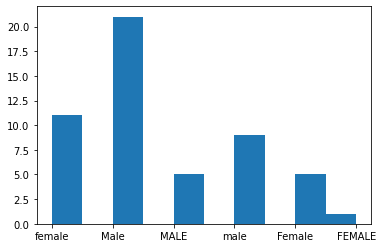

In [137]:
male = 0
female = 0
for gender in Genders:
    if gender == 'female' or gender == 'FEMALE' or gender == 'Female':
        female += 1
    if gender == 'male' or gender == 'Male' or gender == 'm' or gender == 'M' or gender == 'MALE':
        male += 1
plt.hist(Genders)

In [138]:
male

35

Mean = 36.26923076923077
Std = 7.94237753740941
Youngest moomoo = 24
Oldest budhe = 56


(array([7., 7., 8., 6., 9., 6., 3., 1., 2., 3.]),
 array([24. , 27.2, 30.4, 33.6, 36.8, 40. , 43.2, 46.4, 49.6, 52.8, 56. ]),
 <BarContainer object of 10 artists>)

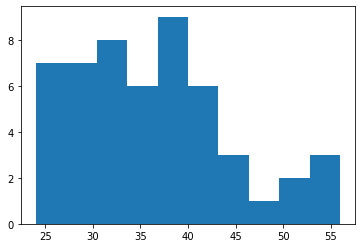

In [139]:
print('Mean = %s'%np.mean(Ages))
print('Std = %s' %np.std(Ages))
print('Youngest moomoo = %s' %np.min(Ages))
print('Oldest budhe = %s' %np.max(Ages))

plt.hist(Ages)

(array([69., 13.,  3.,  4.,  0.,  1.,  1.,  1.,  1.,  1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

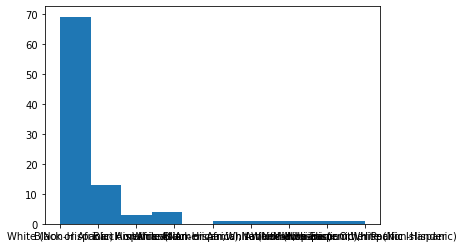

In [94]:
plt.hist(Races)

(array([ 1.,  0., 12.,  0.,  7.,  0., 27.,  0.,  6.,  3.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

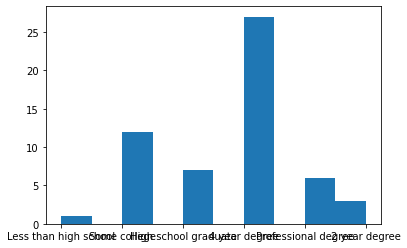

In [18]:
plt.hist(Education)